Created on Tue Oct 31 11:45:51 2017

@author: gnjeavalos

In [22]:
import cython
from numba import jit, autojit
from IPython.core.magic import *
import time
import math
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

"""fsadfasd""""

In [23]:
start = time.time()

dsfasdgdsfg

# #fasdfasdgfas

In [24]:
p_m = 30
pc = 24

#ns = 6 #numero sanduches
#np = 12 # numero paquetes
ns = 6*12 #Cantidad total de sanduches en multiempaque
attempts = 30000

In [25]:
#Funciones

@autojit 
@cython.boundscheck(False)
@cython.wraparound(False)   
def pes_c(pc):
    """Idem to cal() but for weight
    """
    if np.random.randint(0, 2) == 0:
        r = 0
        s = 0

    else:
        r = 1
        if np.random.randint(0, 2) == 1:

            s = 1
        else:
            s = -1
        if np.random.randint(0,2) == 1:
            a = 1
        else:
            a = 2
    inc = np.random.rand() #Para tratar el peso como variable continua, no discreta

    p = pc + s*r*inc*a

    return p

@autojit 
@cython.boundscheck(False)
@cython.wraparound(False)   
def pes(pm):
    """Idem to cal() but for weight
    """
    if np.random.randint(0, 2) == 0:
        r = 0
        s = 0

    else:
        r = 1
        if np.random.randint(0, 2) == 1:

            s = 1
        else:
            s = -1
        if np.random.randint(0,2) == 1:
            a = 1
        else:
            a = 2
    inc = np.random.rand() #Para tratar el peso como variable continua, no discreta

    p = (pm + s*r*inc*a)
   #p = pm + s*r*inc*a

    return p

def san(pm,pc):
    pt1 = pes(pm)
    pt2 = pes(pm)
    pcr = pes_c(pc)
    ps = pt1 + pt2 + pcr
    #print ps
    return ps

def sim_pq(ns,pm,pc):
    """ns: numero sanduches por pq"""
    pq_R = np.zeros(ns) 
    #print pq_R
    for i in range(ns):
        pq_R[i] = san(pm,pc)/10.
        #print pq_R
    pq_Rsum = np.sum(pq_R)
    return pq_Rsum

peso_f6 = sim_pq(ns,p_m,pc)

def sim_res(attempts,ns,pm,pc):
    """ns: numero sanduches por pq"""
    res_R = np.zeros(attempts) 
    #print pq_R
    for i in range(attempts):
        res_R[i] = sim_pq(ns,p_m,pc)
        #print pq_R
#    pq_Rsum = np.sum(pq_R)
    return res_R

[ 604.78888935  604.56310159  604.2017685  ...,  606.94595117  604.40905778
  605.01998979]


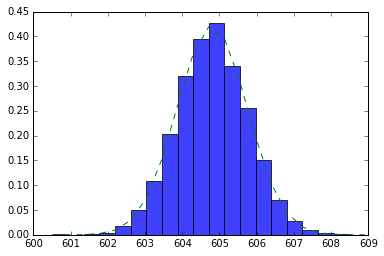

4.59682703018


In [26]:
Sim_f6 = sim_res(attempts,ns,p_m,pc)

print Sim_f6

nR, binsR, patchesR = plt.hist(Sim_f6, 20, normed=1, facecolor='blue', alpha=0.75)

#Descriptivos
muR = np.mean(Sim_f6)
moR = stats.mode(Sim_f6)
sigmaR = np.std(Sim_f6)
# add a 'best fit' line
yR = mlab.normpdf(binsR, muR, sigmaR)
lR = plt.plot(binsR, yR, 'g--', linewidth=1)

plt.show()


np.savetxt("F6_NB_out.xls", Sim_f6, delimiter=",", header="Peso_Neto")
end = time.time()
print(end - start)

In [27]:
import webbrowser
# generate an URL
url = 'https://' + 'controlgjea.shinyapps.io/DOE_ensayos/'
webbrowser.open(url)

True

In [28]:
from ipywidgets import widgets  

# Create text widget for output
output_text = widgets.Text()

# Create text widget for input
input_text = widgets.Text()

# Define function to bind value of the input to the output variable 
def bind_input_to_output(sender):
    output_text.value = input_text.value

# Tell the text input widget to call bind_input_to_output() on submit
input_text.on_submit(bind_input_to_output)

# Display input text box widget for input
input_text

# Display output text box widget (will populate when value submitted in input)
output_text

# Display text value of string in output_text variable
output_text.value

# Define new string variable with value of output_text, do something to it
uppercase_string = output_text.value.upper()
print uppercase_string

u''